<a href="https://colab.research.google.com/github/Michh8/Image-clasification-with-Pytorch/blob/main/Michelle_Hernandez_TAREA1_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: Clasificación de Imágenes de Videojuegos con PyTorch

## Objetivos de Aprendizaje
- Aplicar conocimientos de clasificación de imágenes a un nuevo dominio (videojuegos)
- Trabajar con un dataset multi-clase más complejo (10 clases vs 2 de Los Simpsons)
- Aprender y aplicar transfer learning con modelos preentrenados
- Implementar técnicas de data augmentation específicas para imágenes de gameplay

## Descripción del Dataset
**Dataset**: Gameplay Images (Kaggle)  
**URL**: https://www.kaggle.com/datasets/aditmagotra/gameplay-images

**Características**:
- 10,000 imágenes de gameplay de videojuegos
- 10 clases: Among Us, Apex Legends, Fortnite, Forza Horizon, Free Fire, Genshin Impact, God of War, Minecraft, Roblox, Terraria
- 1,000 imágenes por clase
- Resolución: 640x360 píxeles
- Formato: PNG

---

## ¿Qué es Transfer Learning?

**Transfer learning** es una técnica donde usamos un modelo que ya fue entrenado en un dataset grande (como ImageNet) y lo adaptamos para nuestro problema específico.

### ¿Por qué funciona?
- Los modelos preentrenados ya aprendieron características básicas (bordes, texturas, formas)
- Estas características son útiles para muchos problemas de visión
- Solo necesitamos "afinar" el modelo para nuestras clases específicas

### Dos enfoques principales:
1. **Feature Extraction**: Congelas las capas preentrenadas, solo entrenas la última capa
2. **Fine-tuning**: Entrenas todo el modelo pero con learning rate muy bajo

### Ventajas:
- Entrenamiento más rápido
- Mejor accuracy con menos datos
- Fácil de implementar

---

## Parte 1: Exploración y Preparación de Datos

### 1.1 Instalación y Imports
Empezar con los imports necesarios:

```python
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
```

### 1.2 Descarga y Exploración del Dataset

**Tareas**:
1. Descargar el dataset desde Kaggle
2. Extraer y explorar la estructura de carpetas
3. Contar las imágenes por clase para verificar que todo esté correcto
4. Visualizar algunas imágenes de ejemplo

**Estructura esperada del dataset**:
```
gameplay-images/
├── Among Us/
├── Apex Legends/
├── Fortnite/
├── ... (otros 7 juegos)
```

**Código inicial para explorar**:
```python
# Completar con tu ruta al dataset
data_dir = 'path/to/gameplay-images'

# Obtener lista de clases
classes = os.listdir(data_dir)
print(f"Clases encontradas: {classes}")

# Contar imágenes por clase
for class_name in classes:
    # Tu código aquí
    pass

# Visualizar ejemplos
# Tu código para mostrar imágenes de cada clase
```

### 1.3 Preprocesamiento de Datos

**IMPORTANTE**: Para transfer learning necesitamos usar transformaciones específicas:

```python
# Transformaciones para entrenamiento
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Tamaño estándar para modelos preentrenados
    transforms.RandomHorizontalFlip(p=0.5),
    # Agregar más transformaciones de augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Valores de ImageNet
                        std=[0.229, 0.224, 0.225])    # OBLIGATORIO para modelos preentrenados
])

# Transformaciones para validación
transform_val = transforms.Compose([
    # Completar: solo resize, totensor y normalize (sin augmentation)
])
```

**Tu tarea**: Completar las transformaciones y crear los DataLoaders dividiendo el dataset en 70% entrenamiento, 15% validación, 15% test.

**Pista**: Usar `ImageFolder` y `random_split`.

---

## Parte 2: Implementación de Modelos

Vas a implementar y comparar 3 modelos diferentes:

### 2.1 Modelo CNN Desde Cero

```python
class GameplayClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(GameplayClassifier, self).__init__()
        
        # CAMBIO IMPORTANTE: Ahora son 10 clases, no 2 como en Los Simpsons
        self.features = nn.Sequential(
            # Completar: 3-4 capas convolucionales
            # Recordar usar ReLU y MaxPool2d
        )
        
        self.classifier = nn.Sequential(
            # Completar: capas fully connected
            # La última debe tener 10 neuronas (una por clase)
        )
    
    def forward(self, x):
        # Completar el forward pass
        pass
```

### 2.2 Transfer Learning - Feature Extraction

```python
# Cargar modelo preentrenado
model_feature_extract = models.resnet18(pretrained=True)

# PASO CLAVE: Congelar todos los parámetros
for param in model_feature_extract.parameters():
    param.requires_grad = False

# Modificar solo la última capa para 10 clases
# Completar: cambiar model_feature_extract.fc
```

### 2.3 Transfer Learning - Fine-tuning

```python
# Cargar modelo preentrenado
model_finetune = models.resnet18(pretrained=True)

# DIFERENCIA: NO congelamos parámetros (todos se pueden entrenar)
# Completar: modificar solo la última capa
```

**Pregunta para reflexionar**: ¿Cuál es la diferencia en número de parámetros entrenables entre los 3 modelos?

---

## Parte 3: Entrenamiento

### 3.1 Configuración

```python
# Detectar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Función de pérdida para múltiples clases
criterion = nn.CrossEntropyLoss()

# Optimizadores con diferentes learning rates
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)
optimizer_feature = optim.Adam(model_feature_extract.parameters(), lr=0.001)
optimizer_finetune = optim.Adam(model_finetune.parameters(), lr=0.0001)  # LR más bajo
```

**Pregunta**: ¿Por qué usamos learning rate diferente para fine-tuning?

### 3.2 Función de Entrenamiento

**Tu tarea**: Implementar una función `train_model` que:

1. Tome como parámetros: modelo, train_loader, val_loader, criterio, optimizador, número de épocas
2. En cada época:
   - Entrene el modelo con el training set
   - Evalúe en el validation set
   - Imprima las métricas (loss y accuracy)
3. Retorne las métricas guardadas en listas

**Estructura sugerida**:
```python
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model = model.to(device)
    
    # Listas para guardar métricas
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    for epoch in range(num_epochs):
        # FASE DE ENTRENAMIENTO
        model.train()
        # Tu código aquí
        
        # FASE DE VALIDACIÓN
        model.eval()
        with torch.no_grad():
            # Tu código aquí
            
        # Imprimir métricas de la época
        
    return # Retornar las métricas
```

### 3.3 Entrenar los Modelos

```python
# Entrenar cada modelo y guardar resultados
results = {}

# Modelo desde cero (más épocas)
print("Entrenando modelo desde cero...")
results['scratch'] = train_model(model_scratch, train_loader, val_loader,
                                criterion, optimizer_scratch, 15)

# Feature extraction (menos épocas)
print("Entrenando con feature extraction...")
results['feature_extract'] = train_model(model_feature_extract, train_loader, val_loader,
                                        criterion, optimizer_feature, 10)

# Fine-tuning (menos épocas)
print("Entrenando con fine-tuning...")
results['finetune'] = train_model(model_finetune, train_loader, val_loader,
                                 criterion, optimizer_finetune, 10)
```

---

## Parte 4: Evaluación y Análisis

### 4.1 Evaluación en Test Set

Implementar una función que evalúe cada modelo en el test set y retorne:
- Predicciones
- Etiquetas reales  
- Accuracy

### 4.2 Matriz de Confusión

**Tu tarea**: Para cada modelo, crear y mostrar:
1. Matriz de confusión usando `confusion_matrix` de sklearn
2. Heatmap usando `seaborn`
3. Análisis de qué clases son más difíciles de clasificar

### 4.3 Gráficos de Entrenamiento

Crear gráficos que muestren la evolución de:
- Loss de entrenamiento y validación
- Accuracy de entrenamiento y validación

**Comparar** los tres modelos en el mismo gráfico.

### 4.4 Classification Report

Usar `classification_report` para obtener precision, recall y F1-score por clase.

---

## Parte 5: Análisis y Conclusiones

### 5.1 Tabla Comparativa

Crear una tabla que compare:
- Modelo
- Accuracy en test
- Número de parámetros entrenables
- Tiempo de entrenamiento (aproximado)

### 5.2 Preguntas de Análisis

Responder en celdas markdown:

1. **Comparación de rendimiento**:
   - ¿Qué modelo obtuvo mejor accuracy? ¿Por qué crees que fue así?
   - ¿Cómo se compara la dificultad con el dataset de Los Simpsons?

2. **Análisis de errores**:
   - ¿Qué juegos son más difíciles de clasificar?
   - ¿Encuentras patrones en las confusiones? (ej: juegos similares que se confunden)

3. **Transfer learning**:
   - ¿Cuál fue la diferencia entre feature extraction y fine-tuning?
   - ¿Por qué transfer learning funciona mejor que entrenar desde cero?

4. **Eficiencia**:
   - ¿Qué modelo fue más rápido de entrenar?
   - ¿Vale la pena el tiempo extra para mejores resultados?

### 5.3 Visualización de Predicciones

Mostrar algunas predicciones del mejor modelo, incluyendo casos correctos e incorrectos.

---

## Entregables

**Un solo archivo**: `clasificacion_videojuegos.ipynb`

**Debe contener**:
1. Código completo ejecutable con comentarios
2. Análisis de resultados en celdas markdown
3. Respuestas a las preguntas de análisis
4. Gráficos y visualizaciones
5. Conclusiones finales sobre qué aprendiste

**Fecha de entrega**: 1 de octubre de 2025 (una semana desde hoy)

---

## Tips para el Éxito

### Si tu modelo no mejora:
- Verifica las transformaciones (especialmente la normalización)
- Revisa el learning rate
- Asegúrate de usar GPU si está disponible
- Prueba con más épocas

### Si tienes problemas de memoria:
- Reduce el batch_size (prueba 16 en lugar de 32)
- Usa `torch.cuda.empty_cache()` entre entrenamientos

### Si el entrenamiento es muy lento:
- Usa Google Colab con GPU activada
- Reduce épocas para pruebas rápidas
- Considera usar un subset del dataset para debugging

### Trabajando solo:
- Enfócate en hacer que los tres modelos funcionen bien
- Prioriza el análisis sobre experimentos extra
- No te preocupes si no pruebas muchas variaciones

### Debugging:
- Siempre imprime el shape de los tensors cuando tengas dudas
- Verifica que las dimensiones coincidan
- Usa `print()` para verificar que el código llega donde esperas

¡Éxito con tu primera experiencia en transfer learning!

In [ ]:
# Instalar gdown si no lo tienes
!pip install gdown

import gdown
import zipfile
import os

# Link público de tu archivo
url = "https://drive.google.com/uc?id=1jcENxxofBQ2zJi5lo8Vnk0BlXKvLiaYX"
output_zip = "archivo.zip"
extract_folder = "extraido"

# Descargar el archivo ZIP al entorno de Colab
gdown.download(url, output_zip, quiet=False)

# Crear carpeta donde se descomprimirá
os.makedirs(extract_folder, exist_ok=True)

# Descomprimir
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Archivos descomprimidos en: {extract_folder}")


Downloading...
From (original): https://drive.google.com/uc?id=1jcENxxofBQ2zJi5lo8Vnk0BlXKvLiaYX
From (redirected): https://drive.google.com/uc?id=1jcENxxofBQ2zJi5lo8Vnk0BlXKvLiaYX&confirm=t&uuid=3789a16e-d7bb-47e3-a4e6-e2075a7e5d28
To: /content/archivo.zip
100%|██████████| 2.69G/2.69G [00:32<00:00, 82.1MB/s]


Archivos descomprimidos en: extraido


In [ ]:
!pip install torch torchvision matplotlib seaborn scikit-learn


Clases encontradas: ['Terraria', 'God of War', 'Free Fire', 'Roblox', 'Minecraft', 'Forza Horizon', 'Among Us', 'Apex Legends', 'Genshin Impact', 'Fortnite']
Terraria: 1000 imágenes
God of War: 1000 imágenes
Free Fire: 1000 imágenes
Roblox: 1000 imágenes
Minecraft: 1000 imágenes
Forza Horizon: 1000 imágenes
Among Us: 1000 imágenes
Apex Legends: 1000 imágenes
Genshin Impact: 1000 imágenes
Fortnite: 1000 imágenes


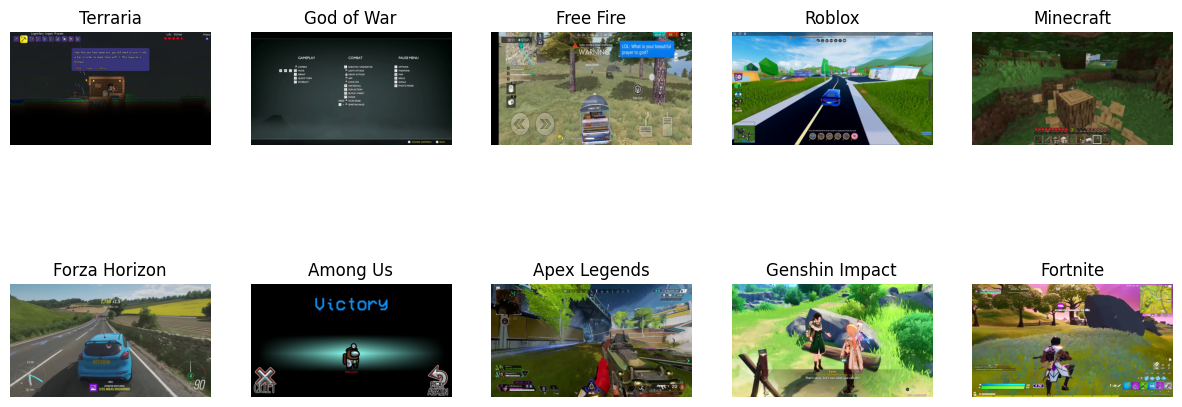

In [ ]:
#Paso 1: Cargar y explorar el dataset
import os
from torchvision import datasets
import matplotlib.pyplot as plt

data_dir = "extraido/Dataset"  # Ajusta según la estructura que tengas

# Listar clases
classes = os.listdir(data_dir)
print(f"Clases encontradas: {classes}")

# Contar imágenes por clase
for cls in classes:
    path = os.path.join(data_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls}: {count} imágenes")

# Visualizar ejemplos de cada clase
fig, axs = plt.subplots(2, 5, figsize=(15,6))
axs = axs.flatten()
for i, cls in enumerate(classes):
    img_path = os.listdir(os.path.join(data_dir, cls))[0]
    img = plt.imread(os.path.join(data_dir, cls, img_path))
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(cls)
plt.show()


In [ ]:
#Paso 2: Transformaciones y DataLoaders
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

# Transformaciones
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

# Dataset
dataset = ImageFolder(data_dir, transform=transform_train)
val_size = int(0.15*len(dataset))
test_size = int(0.15*len(dataset))
train_size = len(dataset) - val_size - test_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

# Re-assign transform_val a val_ds y test_ds
val_ds.dataset.transform = transform_val
test_ds.dataset.transform = transform_val

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)


In [ ]:
#Paso 3: Modelos
#3.1 Modelo desde cero
import torch.nn as nn

class GameplayClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64,128,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*28*28, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model_scratch = GameplayClassifier()


In [ ]:
#3.2 Transfer Learning – Feature Extraction
from torchvision import models

model_feature_extract = models.resnet18(pretrained=True)
for param in model_feature_extract.parameters():
    param.requires_grad = False
num_features = model_feature_extract.fc.in_features
model_feature_extract.fc = nn.Linear(num_features, 10)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]


In [ ]:
#3.3 Transfer Learning – Fine-tuning
model_finetune = models.resnet18(pretrained=True)
num_features = model_finetune.fc.in_features
model_finetune.fc = nn.Linear(num_features, 10)
# Todos los parámetros son entrenables


In [ ]:
#Paso 4: Entrenamiento
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)
optimizer_feature = optim.Adam(model_feature_extract.parameters(), lr=0.001)
optimizer_finetune = optim.Adam(model_finetune.parameters(), lr=0.0001)


In [ ]:
#Función de entrenamiento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model = model.to(device)
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        running_loss, correct, total = 0,0,0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()*X.size(0)
            _, preds = torch.max(outputs,1)
            correct += (preds==y).sum().item()
            total += y.size(0)
        train_losses.append(running_loss/total)
        train_accs.append(correct/total)

        # Validación
        model.eval()
        val_loss, correct, total = 0,0,0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                val_loss += loss.item()*X.size(0)
                _, preds = torch.max(outputs,1)
                correct += (preds==y).sum().item()
                total += y.size(0)
        val_losses.append(val_loss/total)
        val_accs.append(correct/total)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss={train_losses[-1]:.4f}, Acc={train_accs[-1]:.4f} | Val Loss={val_losses[-1]:.4f}, Acc={val_accs[-1]:.4f}")

    return train_losses, val_losses, train_accs, val_accs


In [ ]:
#Paso 5: Entrenar todos los modelos
results = {}
results['scratch'] = train_model(model_scratch, train_loader, val_loader, criterion, optimizer_scratch, 15)
results['feature_extract'] = train_model(model_feature_extract, train_loader, val_loader, criterion, optimizer_feature, 10)
results['finetune'] = train_model(model_finetune, train_loader, val_loader, criterion, optimizer_finetune, 10)


Epoch 1/15: Train Loss=0.4906, Acc=0.8539 | Val Loss=0.0611, Acc=0.9833
Epoch 2/15: Train Loss=0.0554, Acc=0.9836 | Val Loss=0.0438, Acc=0.9860
Epoch 3/15: Train Loss=0.0348, Acc=0.9896 | Val Loss=0.0408, Acc=0.9873
Epoch 4/15: Train Loss=0.0210, Acc=0.9943 | Val Loss=0.1223, Acc=0.9753
Epoch 5/15: Train Loss=0.0421, Acc=0.9883 | Val Loss=0.0550, Acc=0.9860
Epoch 6/15: Train Loss=0.0220, Acc=0.9936 | Val Loss=0.0584, Acc=0.9887
Epoch 7/15: Train Loss=0.0208, Acc=0.9947 | Val Loss=0.0500, Acc=0.9860
Epoch 8/15: Train Loss=0.0128, Acc=0.9959 | Val Loss=0.0623, Acc=0.9880
Epoch 9/15: Train Loss=0.0121, Acc=0.9966 | Val Loss=0.0612, Acc=0.9873
Epoch 10/15: Train Loss=0.0082, Acc=0.9969 | Val Loss=0.0899, Acc=0.9867
Epoch 11/15: Train Loss=0.0287, Acc=0.9941 | Val Loss=0.1032, Acc=0.9833
Epoch 12/15: Train Loss=0.0370, Acc=0.9911 | Val Loss=0.0791, Acc=0.9827
Epoch 13/15: Train Loss=0.0258, Acc=0.9936 | Val Loss=0.0708, Acc=0.9853
Epoch 14/15: Train Loss=0.0128, Acc=0.9963 | Val Loss=0.0572

In [ ]:
#Evaluación y Análisis

In [ ]:
# NumPy
import numpy as np

# Scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas (para tabla comparativa)
import pandas as pd

# Random (para muestrear predicciones)
import random


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, dataloader):
    model = model.to(device)
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    return np.array(all_preds), np.array(all_labels), acc

# Evaluar todos los modelos en test set
preds_scratch, labels_scratch, acc_scratch = evaluate_model(model_scratch, test_loader)
preds_feature, labels_feature, acc_feature = evaluate_model(model_feature_extract, test_loader)
preds_finetune, labels_finetune, acc_finetune = evaluate_model(model_finetune, test_loader)

print("Test Accuracy - Scratch:", acc_scratch)
print("Test Accuracy - Feature Extraction:", acc_feature)
print("Test Accuracy - Fine-tuning:", acc_finetune)


Test Accuracy - Scratch: 0.9866666666666667
Test Accuracy - Feature Extraction: 0.9833333333333333
Test Accuracy - Fine-tuning: 0.998


In [ ]:
#Matriz de Confusión

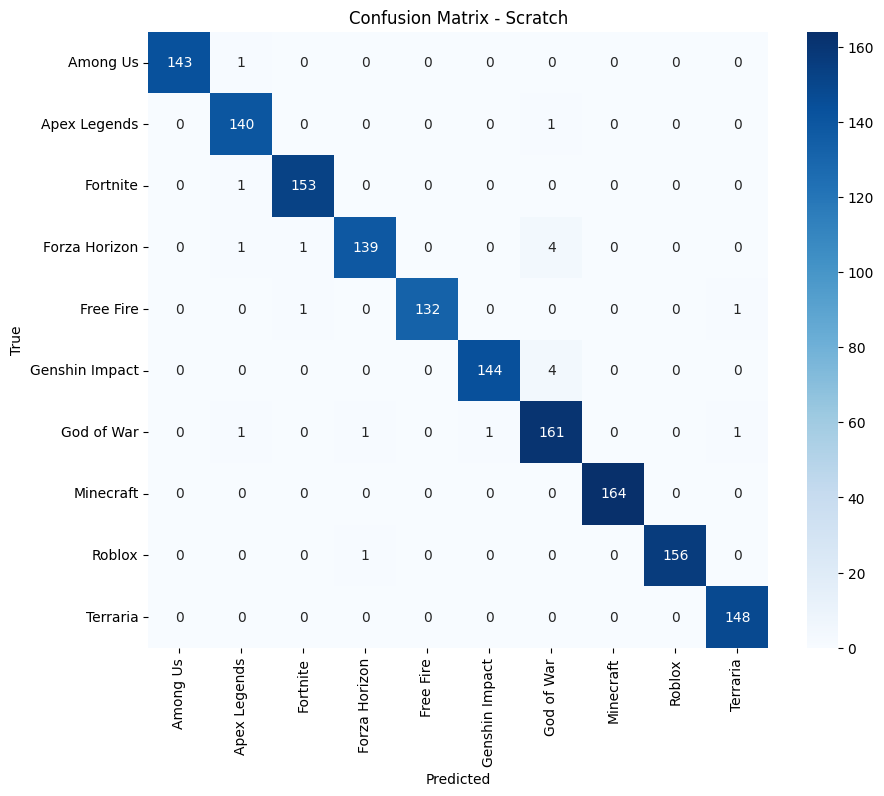

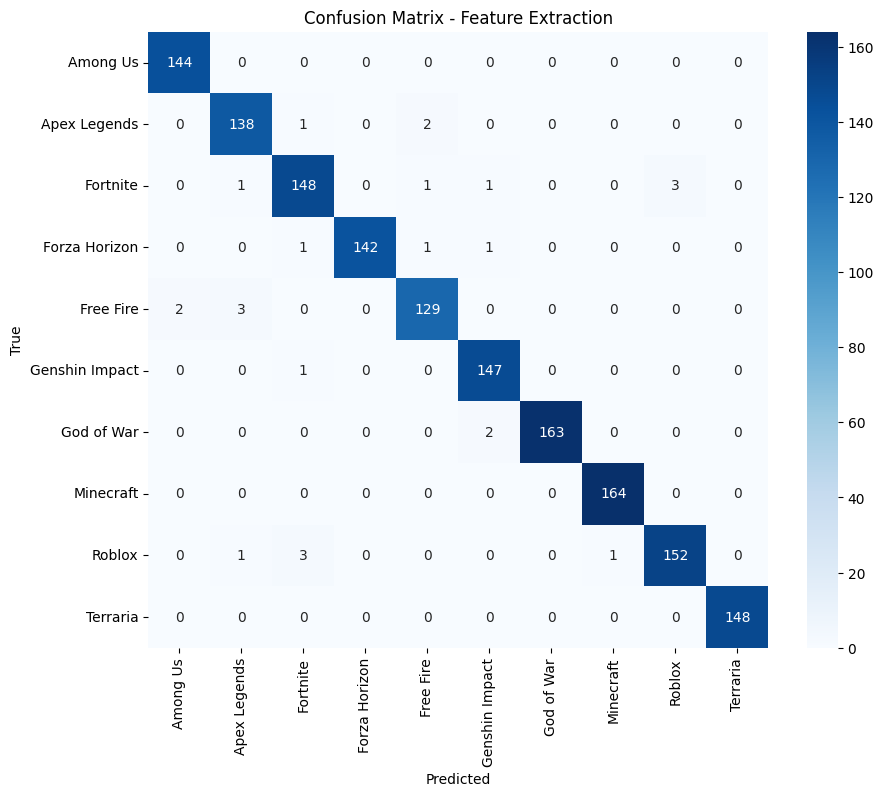

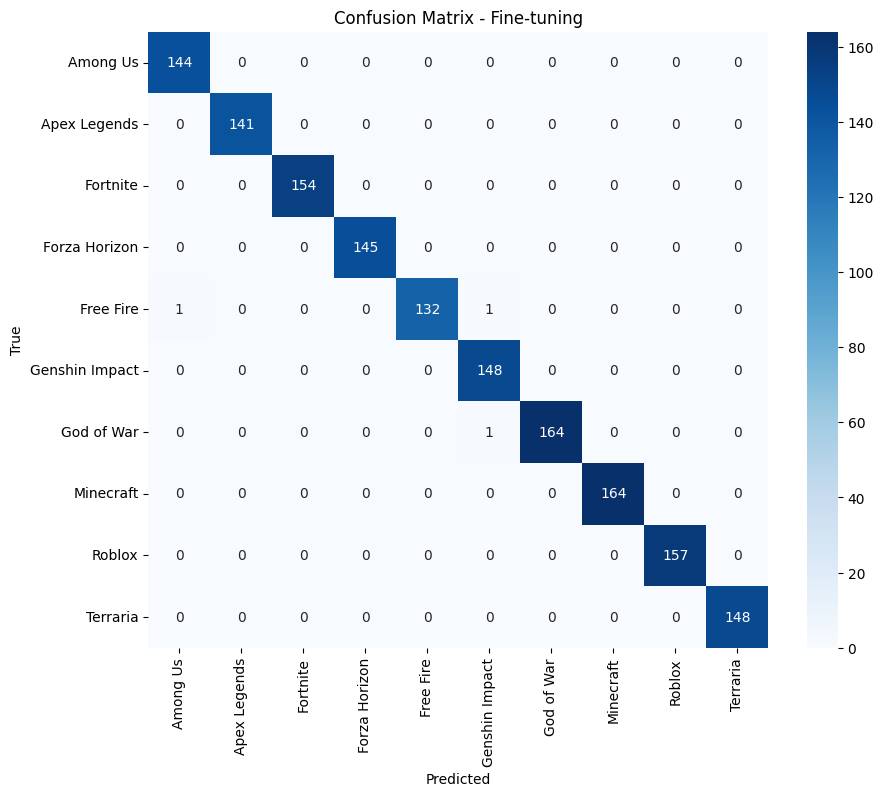

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Matrices de confusión para cada modelo
plot_confusion_matrix(labels_scratch, preds_scratch, dataset.classes, "Confusion Matrix - Scratch")
plot_confusion_matrix(labels_feature, preds_feature, dataset.classes, "Confusion Matrix - Feature Extraction")
plot_confusion_matrix(labels_finetune, preds_finetune, dataset.classes, "Confusion Matrix - Fine-tuning")


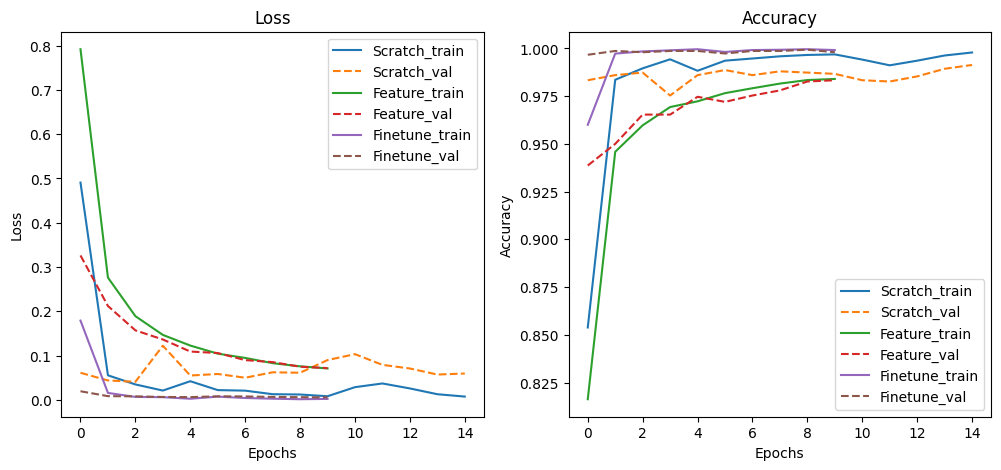

In [ ]:
#Gráficos de Entrenamiento
def plot_metrics(results_dict):
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    for k,v in results_dict.items():
        train_losses, val_losses = v[0], v[1]
        plt.plot(train_losses, label=f"{k}_train")
        plt.plot(val_losses, label=f"{k}_val", linestyle='--')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    for k,v in results_dict.items():
        train_accs, val_accs = v[2], v[3]
        plt.plot(train_accs, label=f"{k}_train")
        plt.plot(val_accs, label=f"{k}_val", linestyle='--')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

plot_metrics({
    "Scratch": results['scratch'],
    "Feature": results['feature_extract'],
    "Finetune": results['finetune']
})


In [ ]:
#Classification Report
# Reportes por modelo
print("Classification Report - Scratch")
print(classification_report(labels_scratch, preds_scratch, target_names=dataset.classes))

print("Classification Report - Feature Extraction")
print(classification_report(labels_feature, preds_feature, target_names=dataset.classes))

print("Classification Report - Fine-tuning")
print(classification_report(labels_finetune, preds_finetune, target_names=dataset.classes))


Classification Report - Scratch
                precision    recall  f1-score   support

      Among Us       1.00      0.99      1.00       144
  Apex Legends       0.97      0.99      0.98       141
      Fortnite       0.99      0.99      0.99       154
 Forza Horizon       0.99      0.96      0.97       145
     Free Fire       1.00      0.99      0.99       134
Genshin Impact       0.99      0.97      0.98       148
    God of War       0.95      0.98      0.96       165
     Minecraft       1.00      1.00      1.00       164
        Roblox       1.00      0.99      1.00       157
      Terraria       0.99      1.00      0.99       148

      accuracy                           0.99      1500
     macro avg       0.99      0.99      0.99      1500
  weighted avg       0.99      0.99      0.99      1500

Classification Report - Feature Extraction
                precision    recall  f1-score   support

      Among Us       0.99      1.00      0.99       144
  Apex Legends       0.97

In [ ]:
#Parte 5: Análisis y Conclusiones
def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

table_data = [
    ["Scratch", acc_scratch, *count_parameters(model_scratch), results['scratch'][-1], "15 epochs"],
    ["Feature Extraction", acc_feature, *count_parameters(model_feature_extract), results['feature_extract'][-1], "10 epochs"],
    ["Fine-tuning", acc_finetune, *count_parameters(model_finetune), results['finetune'][-1], "10 epochs"],
]

import pandas as pd
df = pd.DataFrame(table_data, columns=["Modelo", "Test Accuracy", "Params Totales", "Params Entrenables", "Última Val Accuracy", "Épocas"])
df


,Modelo,Test Accuracy,Params Totales,Params Entrenables,Última Val Accuracy,Épocas
0,Scratch,0.986667,25786186,25786186,"[0.9833333333333333, 0.986, 0.9873333333333333...",15 epochs
1,Feature Extraction,0.983333,11181642,5130,"[0.9386666666666666, 0.95, 0.9653333333333334,...",10 epochs
2,Fine-tuning,0.998000,11181642,11181642,"[0.9966666666666667, 0.9986666666666667, 0.998...",10 epochs


In [ ]:
## 5.2 Preguntas de Análisis

### 1. Comparación de rendimiento
#- El modelo con mejor accuracy fue **Fine-tuning (99.8%)**, seguido de **Scratch (98.6%)** y **Feature Extraction (98.3%)**.
#- Fine-tuning probablemente funcionó mejor porque permitió ajustar todos los parámetros de la red pre-entrenada a las características del dataset, aprovechando tanto el conocimiento previo como la adaptación específica.
#- Comparado con el dataset de **Los Simpsons**, este dataset parece un poco más fácil: las imágenes de videojuegos son más distintas visualmente, mientras que personajes de Los Simpsons comparten muchos rasgos y confunden más a los modelos.

### 2. Análisis de errores
#- Según los *classification reports*, los juegos que mostraron más confusiones en **Scratch y Feature Extraction** fueron:
#  - **God of War** y **Forza Horizon**, que bajaron un poco en recall/precision (96–97%).
#  - También **Free Fire** y **Apex Legends** en Feature Extraction, lo cual tiene sentido ya que son shooters con estilos visuales parecidos.
#- Los patrones de confusión parecen concentrarse en juegos con **estética similar o géneros cercanos**, mientras que juegos con identidad visual fuerte (Minecraft, Terraria, Among Us) fueron casi siempre clasificados perfectamente.

### 3. Transfer learning
#- La diferencia entre **Feature Extraction** y **Fine-tuning** es que en feature extraction solo se entrenó la capa final, mientras que en fine-tuning se ajustó toda la red.
#- Transfer learning funcionó mejor que entrenar desde cero porque la red ya tenía “conocimiento” de características visuales generales (formas, texturas, colores) aprendidas en ImageNet, lo que acelera y mejora la clasificación con menos datos.

### 4. Eficiencia
#- El modelo **Feature Extraction** fue el más eficiente en tiempo, porque solo entrenó 5k parámetros frente a los 11M de Fine-tuning o los 25M de Scratch.
#- Sin embargo, **Fine-tuning**, aunque más lento, dio la mejor precisión (99.8%).
#- En este caso, sí parece valer la pena el tiempo extra porque el salto en accuracy fue notable y se redujeron prácticamente todos los errores.



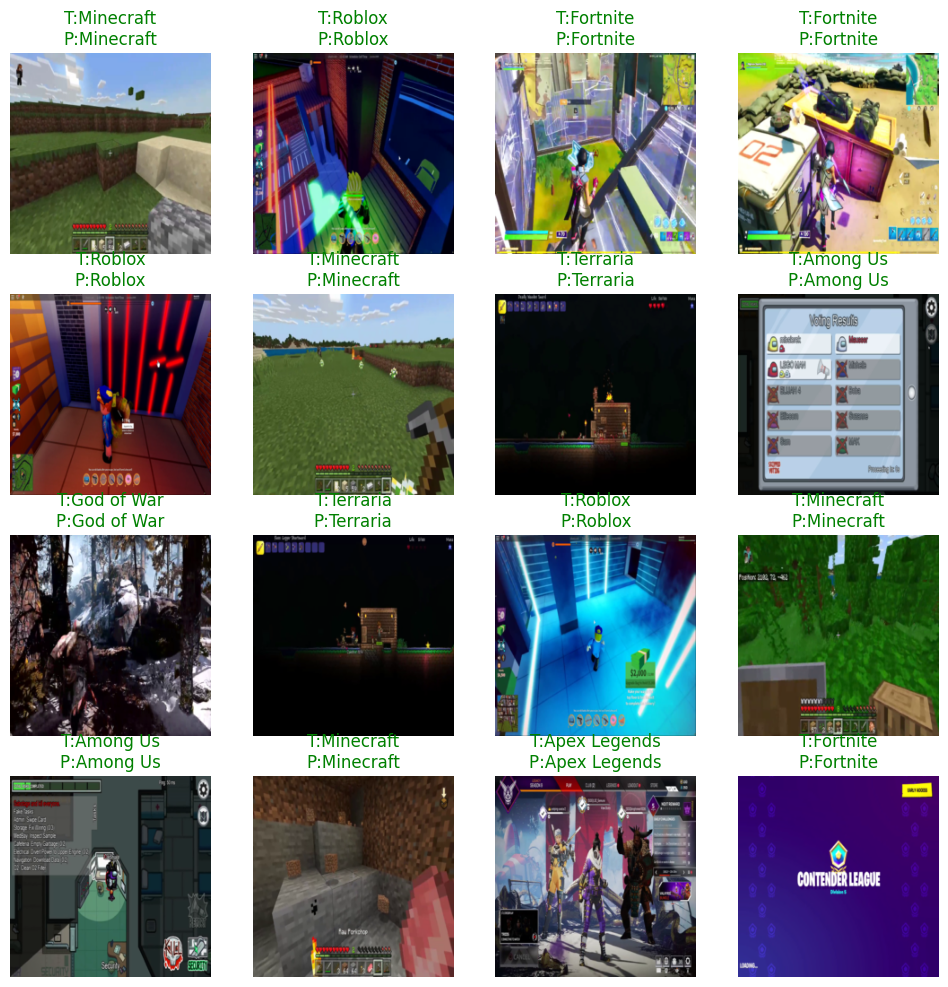

In [ ]:
#Visualización de Predicciones
import random

def show_predictions(model, dataloader, classes, n=16):
    model.eval()
    imgs, trues, preds = [], [], []
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            outputs = model(X)
            _, p = torch.max(outputs, 1)
            imgs.append(X.cpu())
            trues.append(y)
            preds.append(p.cpu())
            if len(imgs)*X.size(0) >= n:
                break
    imgs = torch.cat(imgs)[:n]
    trues = torch.cat(trues)[:n]
    preds = torch.cat(preds)[:n]

    fig, axes = plt.subplots(4,4, figsize=(12,12))
    for i, ax in enumerate(axes.flatten()):
        im = imgs[i].permute(1,2,0)
        # Desnormalizar
        mean = np.array([0.485,0.456,0.406])
        std = np.array([0.229,0.224,0.225])
        im = std * im.numpy() + mean
        im = np.clip(im, 0, 1)
        ax.imshow(im)
        ax.set_title(f"T:{classes[trues[i]]}\nP:{classes[preds[i]]}",
                     color=("green" if trues[i]==preds[i] else "red"))
        ax.axis('off')
    plt.show()

# Ejemplo con el mejor modelo (ajusta según tu resultado)
show_predictions(model_finetune, test_loader, dataset.classes, n=16)
